In [1]:
cd ../..

/Users/janperina/projects/masters-thesis


In [2]:
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import pandas as pd
import glob
from pprint import pprint

In [22]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

sns.set_style("whitegrid")
sns.set_context("paper")

In [4]:
alerts = pd.read_json("data/alarms.json")

In [5]:
pprint(alerts.sample()["source"].iloc[0])

{'alarm_id': '14dc50bded9b64cc776126392aa2c1295bbb0ba8e4b72fdf0b61d110',
 'asn': 3257,
 'from': '2023-02-13 17:13',
 'num_pairs': '16',
 'owner': 'GTT-BACKBONE GTT, US',
 'sites': ['GRIF-IRFU', 'SAMPA', 'IN2P3-CPPM', 'IN2P3-LAPP', 'SARA-MATRIX'],
 'to': '2023-02-14 17:13'}


In [5]:
alerts["owner"] = alerts["source"].apply(lambda x: x["owner"])

In [6]:
alerts["num_sites"] = alerts["tags"].apply(lambda x: len(set(x)))

In [8]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Number of sites affected')

<Figure size 500x500 with 0 Axes>

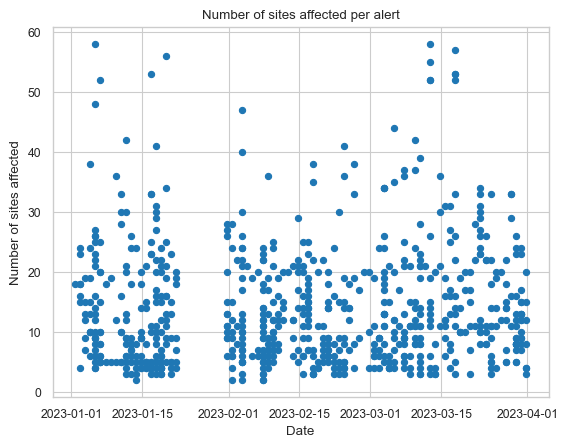

In [38]:
fig= plt.figure(figsize=(5,5))
alerts.plot(kind='scatter', x='created_at', y="num_sites", title="Number of sites affected per alert");
plt.xlabel("Date")
plt.ylabel("Number of sites affected")

Text(0, 0.5, 'Count')

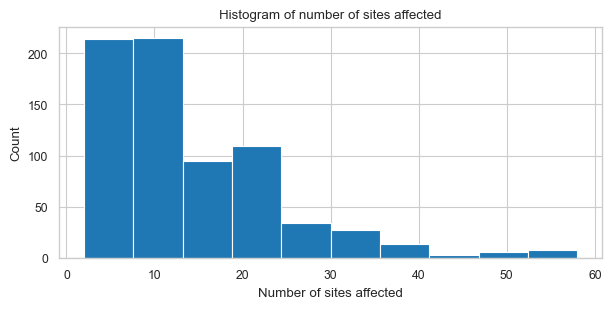

In [37]:
fig = plt.figure(figsize=(7,3))
alerts["num_sites"].plot(kind='hist', title="Histogram of number of sites affected");
plt.xlabel("Number of sites affected")
plt.ylabel("Count")

In [39]:
len(alerts)

725

In [42]:
alerts.head()

,category,subcategory,event,body,tags,source,created_at,owner,num_sites,from,to,num_pairs,asn
0,Networking,RENs,path changed,Path changed,"[BNL-ATLAS, FZK-LCG2, UAM-LCG2, GRIF-LPNHE, IN...","{'asn': 766, 'owner': 'REDIRIS RedIRIS Autonom...",2023-01-01 17:22:48.871,"REDIRIS RedIRIS Autonomous System, ES",18,2022-12-31 17:13:00,2023-01-01 17:13:00,46,766
1,Networking,RENs,path changed,Path changed,"[PURDUE, UKI-LT2-IC-HEP, TRIUMF-LCG2, MWT2, GL...","{'asn': 62, 'owner': 'CONE, US', 'num_pairs': ...",2023-01-02 17:23:15.999,"CONE, US",15,2023-01-01 17:13:00,2023-01-02 17:13:00,19,62
2,Networking,RENs,path changed,Path changed,"[GRIF-LPNHE, PIC, SARA-MATRIX, INFN-T1]","{'asn': 513, 'owner': 'CERN, CH', 'num_pairs':...",2023-01-02 17:23:16.047,"CERN, CH",4,2023-01-01 17:13:00,2023-01-02 17:13:00,11,513
3,Networking,RENs,path changed,Path changed,"[UAM-LCG2, SWT2_CPB, TRIUMF-LCG2, MWT2, AGLT2,...","{'asn': 766, 'owner': 'REDIRIS RedIRIS Autonom...",2023-01-02 17:23:16.078,"REDIRIS RedIRIS Autonomous System, ES",16,2023-01-01 17:13:00,2023-01-02 17:13:00,44,766
4,Networking,RENs,path changed,Path changed,"[PURDUE, VANDERBILT, TRIUMF-LCG2, MWT2, GLOW, ...","{'asn': 2152, 'owner': 'CSUNET-NW, US', 'num_p...",2023-01-02 17:23:16.109,"CSUNET-NW, US",18,2023-01-01 17:13:00,2023-01-02 17:13:00,35,2152


In [50]:
import operator

In [65]:
alerts.groupby(pd.Grouper(key='created_at', freq='1D'))['tags'].aggregate(sum).apply(lambda x: set(x) if not isinstance(x, int) else None).dropna().apply(len).describe()

count    81.000000
mean     45.975309
std      16.973491
min      18.000000
25%      33.000000
50%      43.000000
75%      60.000000
max      81.000000
Name: tags, dtype: float64

In [10]:
len(set(alerts["tags"].sum()))

97

In [17]:
import wordcloud
from collections import Counter
import matplotlib.pyplot as plt

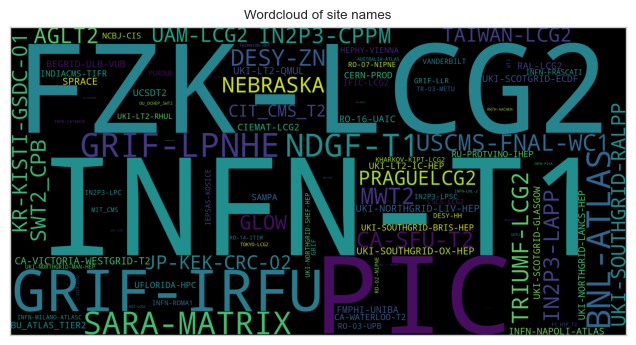

In [67]:
counter = Counter(alerts["tags"].sum())
total = sum(counter.values())
freq = {k:v/total for k,v in counter.items()}
wc = wordcloud.WordCloud(width=2400, height=1200)
wc.fit_words(freq)

fig = plt.figure(figsize=(10,4))
ax = plt.gca()
ax.grid(False)
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
ax.imshow(wc)
plt.title("Wordcloud of site names")
plt.savefig("results/figures/wordcloud-sites.png", dpi=350, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [68]:
counter.most_common(5)

[('INFN-T1', 396),
 ('FZK-LCG2', 328),
 ('PIC', 296),
 ('GRIF-IRFU', 285),
 ('GRIF-LPNHE', 257)]

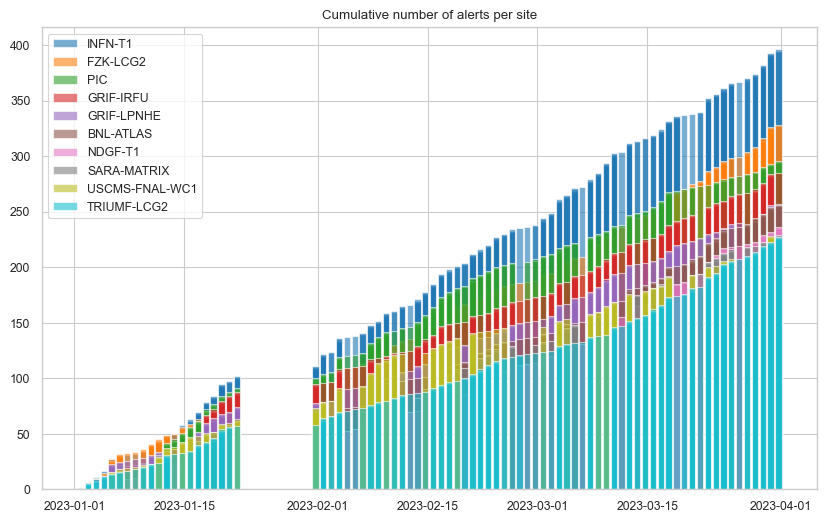

In [26]:
import matplotlib.pyplot as plt
import numpy as np 


fig = plt.figure(figsize=(10, 6))
for site, _ in counter.most_common(10):
    site_idx = []
    cnt = []
    for idx, row in alerts.set_index("created_at").sort_index().iterrows():
        if site in row["tags"]:
            site_idx.append(idx)
            cnt.append(1)
            

    plt.bar(site_idx, np.cumsum(cnt), label=site, alpha=0.6 )

plt.title("Cumulative number of alerts per site")
plt.legend()
plt.show()

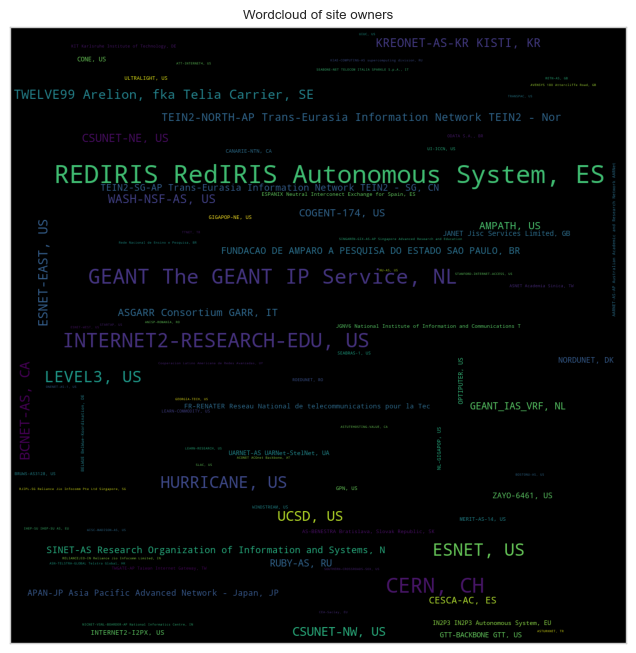

In [27]:
counter = Counter(alerts["owner"])
total = sum(counter.values())
freq = {k:v/total for k,v in counter.items()}
wc = wordcloud.WordCloud(width=1200, height=1200)
wc.fit_words(freq)
fig = plt.figure(figsize=(8,8))
ax = plt.gca()
ax.grid(False)
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
ax.imshow(wc)
plt.title("Wordcloud of site owners")
plt.show()

In [28]:
tmp = pd.DataFrame(freq, index=['frequency']).T.sort_values(by='frequency', ascending=False)

In [29]:
fig = tmp.plot(kind='bar', backend='plotly') 
fig.update_layout(width=1200, height=600, title="Frequency of site owners")

In [30]:
tmp.reset_index(inplace=True)
tmp['state'] = tmp["index"].str.split(', ').apply(lambda x: x[-1])
tmp.set_index('index', inplace=True)

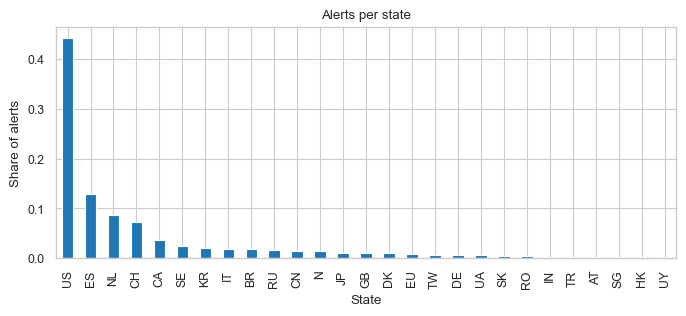

In [35]:
fig = plt.figure(figsize=(8,3))
X = (tmp.groupby('state')['frequency'].sum())
X[X.index.str.len() < 10].sort_values(ascending=False).plot(kind='bar', title='Alerts per state', backend='matplotlib')
plt.xlabel("State")
plt.ylabel("Share of alerts")
plt.savefig("results/figures/wordcloud-states.png", dpi=350, bbox_inches='tight', pad_inches=0.1)



In [32]:
for col in ["from", "to", "num_pairs", "asn"]:
    alerts[col] = alerts["source"].apply(lambda x: x[col])

In [33]:
for col in ["from", "to"]:
    alerts[col] = pd.to_datetime(alerts[col])

In [22]:
alerts["from_dt"] = alerts["from"].dt.dayofweek#.hist(bins=7)

In [23]:
alerts["to_dt"] = alerts["to"].dt.dayofweek#.hist(bins=7)

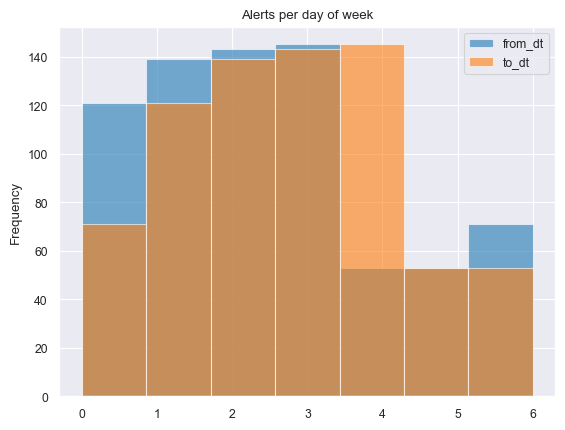

In [24]:
alerts[["from_dt", "to_dt"]].plot(kind='hist', bins=7, alpha=0.6, title="Alerts per day of week");

In [25]:
alerts["hod"] = alerts["from"].dt.hour + 1

In [26]:
alerts["dow"] = alerts["from"].dt.dayofweek + 1

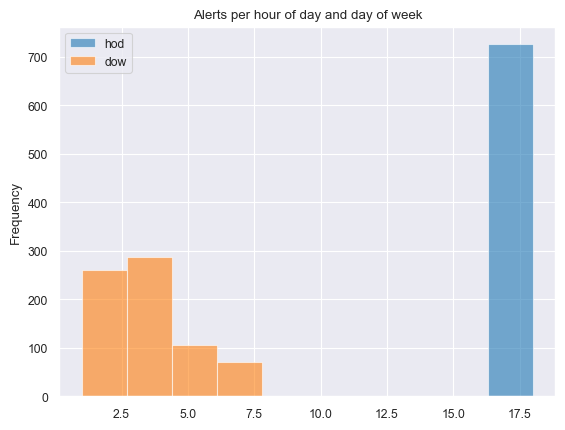

In [27]:
alerts[["hod", "dow"]].plot(title='Alerts per hour of day and day of week', kind='hist', bins=10, alpha=0.6);

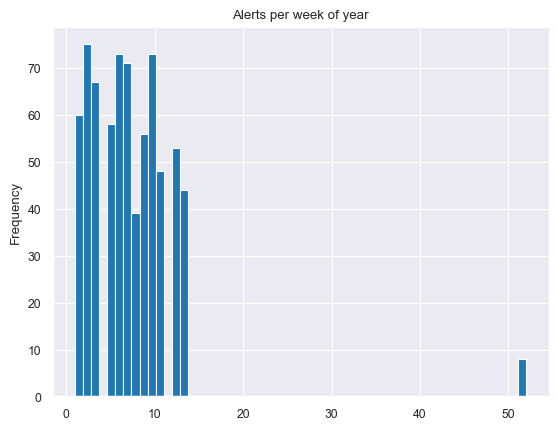

In [28]:
alerts["from"].dt.isocalendar().week.plot(bins=56, kind='hist', title="Alerts per week of year");